In [1]:
#Predictive model analyzing relationship between race and employment status, employer satisfaction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv('HRDataset_v14.csv')
pd.set_option('display.max_columns', None)
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,7/10/1983,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,5/5/1975,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,9/19/1988,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,9/27/1988,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,9/8/1989,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,5/11/1985,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,5/4/1982,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,8/30/1979,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,2/24/1979,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [3]:
#dropping irrelevant columns
data_cleaned = data.drop(columns = ['Employee_Name','Termd','Zip','Sex','EmpID','MarriedID','MaritalStatusID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'ManagerName','ManagerID','State','Position','MaritalDesc','Department','ManagerName','ManagerID','RecruitmentSource','EngagementSurvey','LastPerformanceReview_Date', 'TermReason'])
data_cleaned

,GenderID,Salary,PositionID,DOB,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,EmploymentStatus,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,1,62506,19,7/10/1983,US Citizen,No,White,7/5/2011,NaN,Active,Exceeds,5,0,0,1
1,1,104437,27,5/5/1975,US Citizen,No,White,3/30/2015,6/16/2016,Voluntarily Terminated,Fully Meets,3,6,0,17
2,0,64955,20,9/19/1988,US Citizen,No,White,7/5/2011,9/24/2012,Voluntarily Terminated,Fully Meets,3,0,0,3
3,0,64991,19,9/27/1988,US Citizen,No,White,1/7/2008,NaN,Active,Fully Meets,5,0,0,15
4,0,50825,19,9/8/1989,US Citizen,No,White,7/11/2011,9/6/2016,Voluntarily Terminated,Fully Meets,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,65893,20,5/11/1985,US Citizen,No,White,7/7/2014,NaN,Active,Fully Meets,4,0,0,13
307,0,48513,19,5/4/1982,US Citizen,No,Asian,9/2/2008,9/29/2015,Voluntarily Terminated,PIP,2,0,5,4
308,0,220450,6,8/30/1979,US Citizen,No,White,4/10/2010,NaN,Active,Exceeds,5,6,0,16
309,0,89292,9,2/24/1979,US Citizen,No,White,3/30/2015,NaN,Active,Fully Meets,3,5,0,11


In [4]:
#dropping all employees that were not voluntarily terminated 
#For gender ID, 1 = male and 0 = female 
data_cleaned = data_cleaned[data_cleaned['EmploymentStatus']=='Voluntarily Terminated']

In [5]:
data_cleaned

,GenderID,Salary,PositionID,DOB,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,EmploymentStatus,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
1,1,104437,27,5/5/1975,US Citizen,No,White,3/30/2015,6/16/2016,Voluntarily Terminated,Fully Meets,3,6,0,17
2,0,64955,20,9/19/1988,US Citizen,No,White,7/5/2011,9/24/2012,Voluntarily Terminated,Fully Meets,3,0,0,3
4,0,50825,19,9/8/1989,US Citizen,No,White,7/11/2011,9/6/2016,Voluntarily Terminated,Fully Meets,4,0,0,2
10,0,54670,19,1/12/1974,US Citizen,Yes,Black or African American,1/10/2011,1/12/2017,Voluntarily Terminated,Fully Meets,4,0,0,12
11,1,47211,19,2/21/1974,US Citizen,Yes,Black or African American,4/2/2012,9/19/2016,Voluntarily Terminated,Fully Meets,3,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,55140,19,9/9/1965,Eligible NonCitizen,No,White,5/16/2011,9/7/2015,Voluntarily Terminated,Fully Meets,3,0,0,7
302,0,58062,19,7/30/1983,US Citizen,No,White,1/10/2011,5/14/2012,Voluntarily Terminated,Fully Meets,5,0,0,9
303,0,59728,19,10/2/1969,US Citizen,Yes,Black or African American,1/9/2012,6/27/2015,Voluntarily Terminated,Fully Meets,4,0,0,16
304,1,70507,20,11/7/1958,US Citizen,No,White,1/7/2013,2/21/2016,Voluntarily Terminated,Exceeds,3,0,0,7


In [6]:
#Assign "performance score" an integer value
#Find all unique values in the columns
print(data_cleaned['PerformanceScore'].unique())

['Fully Meets' 'Needs Improvement' 'PIP' 'Exceeds']


In [7]:
# PIP indicates the need for a performance improvement plan, indicating that the employee is performing below expectations
score_to_int = {'PIP': 1, 'Needs Improvement': 2, 'Fully Meets':3,'Exceeds':4}
data_cleaned['PerformanceScore_Int'] = data_cleaned['PerformanceScore'].map(score_to_int)
data_cleaned = data_cleaned.drop('PerformanceScore',axis=1)


/tmp/ipykernel_1065/1196998469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['PerformanceScore_Int'] = data_cleaned['PerformanceScore'].map(score_to_int)


In [8]:
#Find all unique RaceDesc values
print(data_cleaned['RaceDesc'].unique())

['White' 'Black or African American' 'Asian' 'Two or more races']


In [9]:
#Assign races an integer value
race_to_int = {'White':1,'Black or African American':2,'Asian':3,'Two or more races':4}
data_cleaned['RaceDesc_Int'] = data_cleaned['RaceDesc'].map(race_to_int)
data_cleaned = data_cleaned.drop('RaceDesc',axis=1)


In [10]:
#Get all unique CitizenDesc values
print(data_cleaned['CitizenDesc'].unique())

['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']


In [11]:
#Turn CitizenDesc values into integers values
citizen_to_int = {'US Citizen':1,'Eligible NonCitizen':2,'Non-Citizen':3}
data_cleaned['Citizen_int'] = data_cleaned['CitizenDesc'].map(citizen_to_int)
data_cleaned = data_cleaned.drop('CitizenDesc',axis=1)

In [12]:
#Assign lation/hispanic descriptor an integer value
latino_to_int = {'Yes':1,'No':0}
data_cleaned['Latino_Int'] = data_cleaned['HispanicLatino'].map(latino_to_int)
data_cleaned = data_cleaned.drop('HispanicLatino',axis=1)
data_cleaned

,GenderID,Salary,PositionID,DOB,DateofHire,DateofTermination,EmploymentStatus,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore_Int,RaceDesc_Int,Citizen_int,Latino_Int
1,1,104437,27,5/5/1975,3/30/2015,6/16/2016,Voluntarily Terminated,3,6,0,17,3,1,1,0
2,0,64955,20,9/19/1988,7/5/2011,9/24/2012,Voluntarily Terminated,3,0,0,3,3,1,1,0
4,0,50825,19,9/8/1989,7/11/2011,9/6/2016,Voluntarily Terminated,4,0,0,2,3,1,1,0
10,0,54670,19,1/12/1974,1/10/2011,1/12/2017,Voluntarily Terminated,4,0,0,12,3,2,1,1
11,1,47211,19,2/21/1974,4/2/2012,9/19/2016,Voluntarily Terminated,3,0,0,15,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,55140,19,9/9/1965,5/16/2011,9/7/2015,Voluntarily Terminated,3,0,0,7,3,1,2,0
302,0,58062,19,7/30/1983,1/10/2011,5/14/2012,Voluntarily Terminated,5,0,0,9,3,1,1,0
303,0,59728,19,10/2/1969,1/9/2012,6/27/2015,Voluntarily Terminated,4,0,0,16,3,2,1,1
304,1,70507,20,11/7/1958,1/7/2013,2/21/2016,Voluntarily Terminated,3,0,0,7,4,1,1,0


In [15]:
#Find how long an employee worked at the company
#Convert to datetime objects
from datetime import date
data_cleaned['DateofHire'] = pd.to_datetime(data_cleaned['DateofHire'])
data_cleaned['DateofTermination'] = pd.to_datetime(data_cleaned['DateofTermination'])
data_cleaned['DOB'] = pd.to_datetime(data_cleaned['DOB'])
today = pd.to_datetime(date.today())

#calculate time difference in days
data_cleaned['TimeAtCompany'] = (data_cleaned['DateofTermination']-data_cleaned['DateofHire']).dt.days
data_cleaned['EmployeeAge'] = ((today - data_cleaned['DOB']).dt.days)/365

#drop all columns with dates
df_final = data_cleaned.drop('DOB',axis=1)
df_final = data_cleaned.drop('DateofHire',axis=1)
df_final = data_cleaned.drop('DateofTermination',axis=1)
#df_final = data_cleaned.drop('time_dif',axis =1)
df_final


,GenderID,Salary,PositionID,DOB,DateofHire,EmploymentStatus,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore_Int,RaceDesc_Int,Citizen_int,Latino_Int,TimeAtCompany,EmployeeAge
1,1,104437,27,1975-05-05,2015-03-30,Voluntarily Terminated,3,6,0,17,3,1,1,0,444,47.991781
2,0,64955,20,1988-09-19,2011-07-05,Voluntarily Terminated,3,0,0,3,3,1,1,0,447,34.605479
4,0,50825,19,1989-09-08,2011-07-11,Voluntarily Terminated,4,0,0,2,3,1,1,0,1884,33.635616
10,0,54670,19,1974-01-12,2011-01-10,Voluntarily Terminated,4,0,0,12,3,2,1,1,2194,49.301370
11,1,47211,19,1974-02-21,2012-04-02,Voluntarily Terminated,3,0,0,15,3,2,1,1,1631,49.191781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,55140,19,1965-09-09,2011-05-16,Voluntarily Terminated,3,0,0,7,3,1,2,0,1575,57.649315
302,0,58062,19,1983-07-30,2011-01-10,Voluntarily Terminated,5,0,0,9,3,1,1,0,490,39.750685
303,0,59728,19,1969-10-02,2012-01-09,Voluntarily Terminated,4,0,0,16,3,2,1,1,1265,53.583562
304,1,70507,20,1958-11-07,2013-01-07,Voluntarily Terminated,3,0,0,7,4,1,1,0,1140,64.493151


In [ ]:
#descriptive statistics
df_final.describe()

,GenderID,Salary,PositionID,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,PerformanceScore_Int,RaceDesc_Int,Citizen_int,Latino_Int,TimeAtCompany,EmployeeAge
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000
mean,0.420455,63949.204545,18.738636,3.897727,0.511364,0.409091,10.954545,2.954545,1.534091,1.12500,0.090909,1272.090909,45.991407
std,0.496461,17012.771985,3.881860,0.858223,1.568324,1.318623,5.795181,0.523232,0.772351,0.42379,0.289127,733.523705,10.085572
min,0.000000,45115.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,26.000000,31.641096
25%,0.000000,53414.000000,19.000000,3.000000,0.000000,0.000000,6.000000,3.000000,1.000000,1.00000,0.000000,623.000000,38.272603
50%,0.000000,60512.000000,19.000000,4.000000,0.000000,0.000000,11.000000,3.000000,1.000000,1.00000,0.000000,1200.500000,44.235616
75%,1.000000,68529.750000,20.000000,5.000000,0.000000,0.000000,16.000000,3.000000,2.000000,1.00000,0.000000,1735.750000,50.714384
max,1.000000,148999.000000,29.000000,5.000000,7.000000,6.000000,20.000000,4.000000,4.000000,3.00000,1.000000,3493.000000,72.194521


In [ ]:
##Next steps
#Validate the data
#Visualization
#Find prediction model that best fits our needs and implement it 

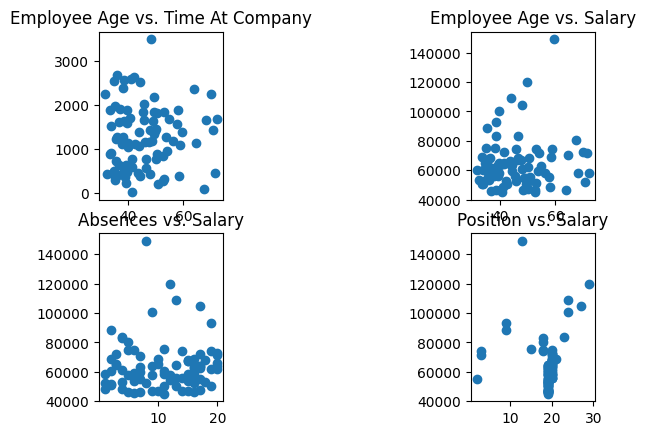

In [25]:
#Visualization to get a better idea of the relationship between the data
fig1,axes = plt.subplots(2,2)
axes[0,0].scatter(df_final['EmployeeAge'],df_final['TimeAtCompany'])
axes[0,0].set_title('Employee Age vs. Time At Company')
axes[0,1].scatter(df_final['EmployeeAge'],df_final['Salary'])
axes[0,1].set_title('Employee Age vs. Salary')
axes[1,0].scatter(df_final['Absences'],df_final['Salary'])
axes[1,0].set_title('Absences vs. Salary')
axes[1,1].scatter(df_final['PositionID'],df_final['Salary'])
axes[1,1].set_title('Position vs. Salary')
plt.subplots_adjust(wspace=2)